In [25]:
#!pip3 install pycaret

In [26]:
#pip install --user pycaret

In [27]:
from pycaret.utils import version
version()

'2.1.2'

In [28]:
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mo

In [29]:
df=pd.read_csv(r'C:\Users\Ajay\Desktop\Sidd\Python\Machine Learning\Machine learning 1\Datasets\kc_house_data.csv')

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df['year']=pd.DatetimeIndex(df['date']).year

In [32]:
df['month']=df['date'].str[4:6]

In [33]:
newdf= df[['price','sqft_living','bathrooms','view','sqft_basement','waterfront','floors','year','month','grade','bedrooms']]

In [34]:
newdf['view']=newdf['view'].astype(str)

In [35]:
newdf['bathrooms']=newdf['bathrooms'].astype(str)

In [36]:
newdf['waterfront']=newdf['waterfront'].astype(str)

In [37]:
newdf['floors']=newdf['floors'].astype(str)

In [38]:
newdf['year']=newdf['year'].astype(str)

In [39]:
newdf['grade']=newdf['grade'].astype(str)

In [40]:
newdf['bedrooms']=newdf['bedrooms'].astype(str)

In [41]:
newdf['price']=np.log1p(newdf['price'])

In [42]:
from pycaret import regression


In [43]:
regression_setup = regression.setup(data= newdf, target='price')


 
Setup Succesfully Completed.


,Description,Value
0,session_id,3939
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(21613, 11)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [44]:
regression_lr = regression.create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2729,0.1192,0.3452,0.5857,0.0246,0.0210
1,0.2680,0.1136,0.3370,0.5984,0.0240,0.0206
2,0.2600,0.1049,0.3238,0.6194,0.0231,0.0200
3,0.2637,0.1074,0.3277,0.6188,0.0234,0.0202
4,0.2654,0.1103,0.3321,0.6166,0.0237,0.0204
5,0.2629,0.1093,0.3306,0.5933,0.0236,0.0202
6,0.2711,0.1144,0.3383,0.5839,0.0241,0.0208
7,0.2614,0.1052,0.3243,0.6375,0.0231,0.0200
8,0.2585,0.1044,0.3232,0.6215,0.0231,0.0199
9,0.2645,0.1091,0.3304,0.5975,0.0236,0.0204


In [45]:
regression_dt = regression.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3622,0.2154,0.4641,0.2512,0.0331,0.0279
1,0.3563,0.2072,0.4552,0.2671,0.0324,0.0273
2,0.3490,0.1981,0.4451,0.2810,0.0318,0.0268
3,0.3673,0.2188,0.4678,0.2229,0.0334,0.0282
4,0.3588,0.2142,0.4628,0.2554,0.0330,0.0275
5,0.3567,0.2083,0.4564,0.2247,0.0326,0.0275
6,0.3620,0.2123,0.4607,0.2282,0.0328,0.0278
7,0.3478,0.1993,0.4464,0.3135,0.0318,0.0267
8,0.3546,0.2046,0.4523,0.2585,0.0323,0.0273
9,0.3608,0.2117,0.4601,0.2193,0.0329,0.0277


In [46]:

regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,0.2579,0.1051,0.3241,0.6240,0.0231,0.0198,7.2882
1,Light Gradient Boosting Machine,0.2592,0.1057,0.3251,0.6218,0.0232,0.0199,0.3822
2,Gradient Boosting Regressor,0.2634,0.1082,0.3289,0.6127,0.0235,0.0202,3.4164
3,Extreme Gradient Boosting,0.2628,0.1093,0.3306,0.6088,0.0236,0.0202,2.7449
4,Bayesian Ridge,0.2646,0.1094,0.3307,0.6085,0.0236,0.0203,0.1091
5,Ridge Regression,0.2646,0.1094,0.3307,0.6084,0.0236,0.0203,0.0362
6,Linear Regression,0.2648,0.1098,0.3312,0.6073,0.0236,0.0204,0.0606
7,Random Sample Consensus,0.2647,0.1107,0.3326,0.6040,0.0237,0.0204,4.4590
8,Random Forest,0.2721,0.1183,0.3439,0.5768,0.0246,0.0209,5.1368
9,Orthogonal Matching Pursuit,0.2763,0.1191,0.3450,0.5741,0.0246,0.0212,0.0380


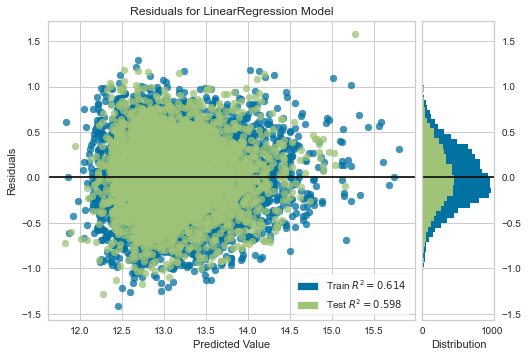

In [47]:
regression.plot_model(regression_lr, plot ='residuals')

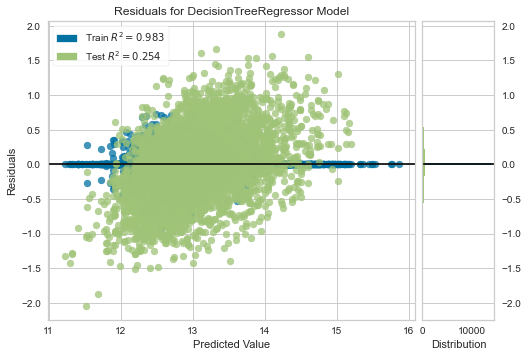

In [48]:
regression.plot_model(regression_dt, plot = 'residuals')

In [49]:
regression.plot_model(regression_lr, plot = 'parameter')

,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
normalize,False


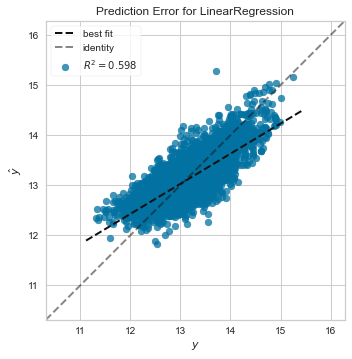

In [50]:
regression.plot_model(regression_lr,plot="error")

In [51]:
 
regression.evaluate_model(regression_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…